In [ ]:
# Step 1: Install required libraries
!pip install transformers pandas matplotlib seaborn wordcloud

In [ ]:
# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from wordcloud import WordCloud
import pickle
import re

In [ ]:
# Step 3: Load Dataset (Kaggle Journal Entries or custom CSV)
# For demo purposes, create a small sample DataFrame
data = {
    'date': pd.date_range(start='2025-03-21', periods=7),
    'text': [
        'Feeling exhausted and burned out today.',
        'Slept well last night. Feeling okay.',
        'Overwhelmed with work. Too much to do.',
        'Caught up with a friend — it felt nice.',
        'Why is everything so difficult this week?',
        'Made some progress on my project.',
        'Anxious about the presentation tomorrow.'
    ]
}
df = pd.DataFrame(data)
df.head()

,date,text
0,2025-03-21,Feeling exhausted and burned out today.
1,2025-03-22,Slept well last night. Feeling okay.
2,2025-03-23,Overwhelmed with work. Too much to do.
3,2025-03-24,Caught up with a friend — it felt nice.
4,2025-03-25,Why is everything so difficult this week?


In [ ]:
# Step 4: Load Emotion Detection Pipeline (BERT)
classifier = pipeline('text-classification', model='bhadresh-savani/bert-base-uncased-emotion')
df['predicted_emotion'] = df['text'].apply(lambda x: classifier(x)[0]['label'])
df.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,date,text,predicted_emotion
0,2025-03-21,Feeling exhausted and burned out today.,sadness
1,2025-03-22,Slept well last night. Feeling okay.,joy
2,2025-03-23,Overwhelmed with work. Too much to do.,fear
3,2025-03-24,Caught up with a friend — it felt nice.,joy
4,2025-03-25,Why is everything so difficult this week?,fear


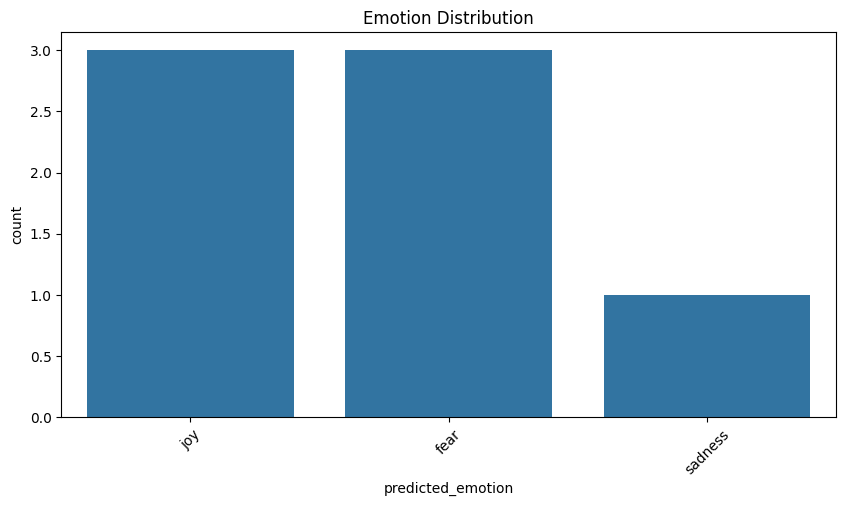

In [ ]:
# Step 5: Generate Visualizations - Emotion Timeline
plt.figure(figsize=(10,5))
sns.countplot(x='predicted_emotion', data=df, order=df['predicted_emotion'].value_counts().index)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

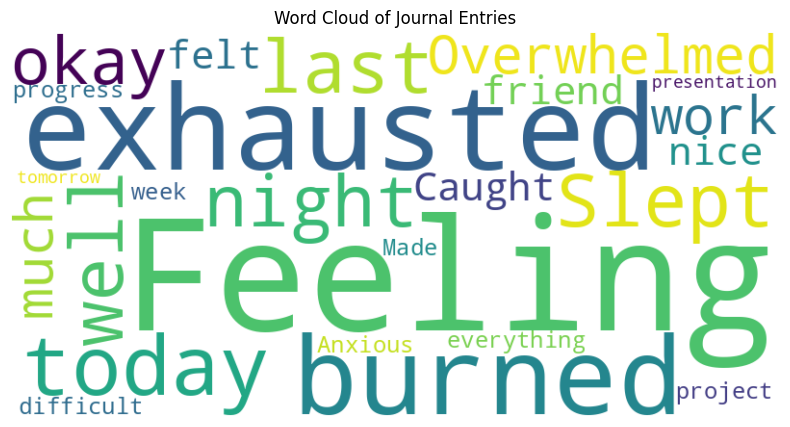

In [ ]:
# Step 6: Generate Word Cloud from Text
text_blob = ' '.join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Journal Entries')
plt.show()

In [ ]:
# Step 7: Suggest Reason Based on Keywords
def guess_reason(text):
    reasons = {
        'anger': ['interrupt', 'ignored', 'slow', 'delay', 'stress'],
        'sadness': ['lonely', 'miss', 'tired', 'empty', 'alone'],
        'joy': ['happy', 'proud', 'fun', 'excited', 'accomplished'],
        'fear': ['scared', 'nervous', 'anxious', 'afraid'],
        'love': ['loved', 'grateful', 'care', 'connection'],
        'surprise': ['unexpected', 'surprised', 'shocked']
    }
    for emotion, keywords in reasons.items():
        for word in keywords:
            if re.search(rf'\b{word}\b', text.lower()):
                return f"Your entry may relate to {emotion}-linked experience like '{word}'."
    return 'No specific reason detected.'

df['likely_reason'] = df['text'].apply(guess_reason)
df[['text', 'predicted_emotion', 'likely_reason']]

,text,predicted_emotion,likely_reason
0,Feeling exhausted and burned out today.,sadness,No specific reason detected.
1,Slept well last night. Feeling okay.,joy,No specific reason detected.
2,Overwhelmed with work. Too much to do.,fear,No specific reason detected.
3,Caught up with a friend — it felt nice.,joy,No specific reason detected.
4,Why is everything so difficult this week?,fear,No specific reason detected.
5,Made some progress on my project.,joy,No specific reason detected.
6,Anxious about the presentation tomorrow.,fear,Your entry may relate to fear-linked experienc...


In [ ]:
# Step 8: Suggest Actions Based on Emotion
suggestions = {
    'anger': 'Try taking a break or writing out what’s frustrating you.',
    'sadness': 'Consider journaling more or going for a short walk.',
    'joy': 'Nice! Reflect on what made you happy and repeat it.',
    'fear': 'Try some deep breathing or talking to someone you trust.',
    'love': 'Think about how to express that to someone.',
    'surprise': 'Write down what surprised you and how it felt.'
}
df['suggestion'] = df['predicted_emotion'].map(suggestions)
df[['text', 'predicted_emotion', 'likely_reason', 'suggestion']]

,text,predicted_emotion,likely_reason,suggestion
0,Feeling exhausted and burned out today.,sadness,No specific reason detected.,Consider journaling more or going for a short ...
1,Slept well last night. Feeling okay.,joy,No specific reason detected.,Nice! Reflect on what made you happy and repea...
2,Overwhelmed with work. Too much to do.,fear,No specific reason detected.,Try some deep breathing or talking to someone ...
3,Caught up with a friend — it felt nice.,joy,No specific reason detected.,Nice! Reflect on what made you happy and repea...
4,Why is everything so difficult this week?,fear,No specific reason detected.,Try some deep breathing or talking to someone ...
5,Made some progress on my project.,joy,No specific reason detected.,Nice! Reflect on what made you happy and repea...
6,Anxious about the presentation tomorrow.,fear,Your entry may relate to fear-linked experienc...,Try some deep breathing or talking to someone ...


In [ ]:
# Step 9: Save the DataFrame as a .pkl File
with open('moodmaze_output.pkl', 'wb') as f:
    pickle.dump(df, f)
print('Data saved as moodmaze_output.pkl')

Data saved as moodmaze_output.pkl
